In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#Import data
data = pd.read_csv("merged_data.csv")
data.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,False
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,False
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,False
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,False


In [3]:
#Drop unnecessary columns
data = data.drop(columns="id")
data = data.drop(columns="date")
data.head()

,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,holiday
0,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,False
1,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,False
2,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,False
3,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,False
4,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,False


In [4]:
#Converting categorical values
data.type = data.type.map(dict(A=0, B=1, C=2, D=3, E=4))
data_dum = pd.get_dummies(data, columns=["family", "city", "state"])
data_dum.head()

,store_nbr,sales,onpromotion,dcoilwtico,type,cluster,holiday,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,...,state_Guayas,state_Imbabura,state_Loja,state_Los Rios,state_Manabi,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua
0,1,0.0,0,93.14,3,13,False,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.0,0,93.14,3,13,False,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0.0,0,93.14,3,13,False,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0.0,0,93.14,3,13,False,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.0,0,93.14,3,13,False,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
#Take part of data
df = data
df = df.iloc[:20000]

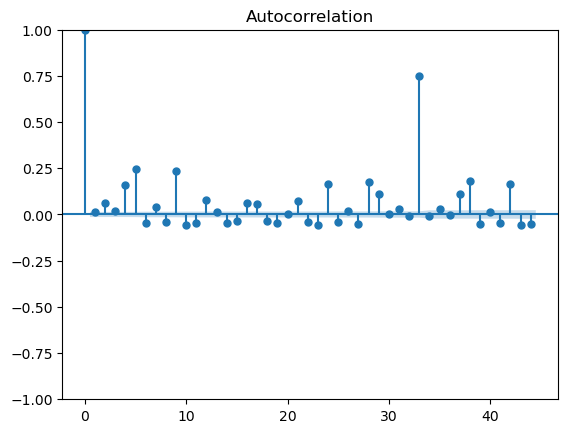

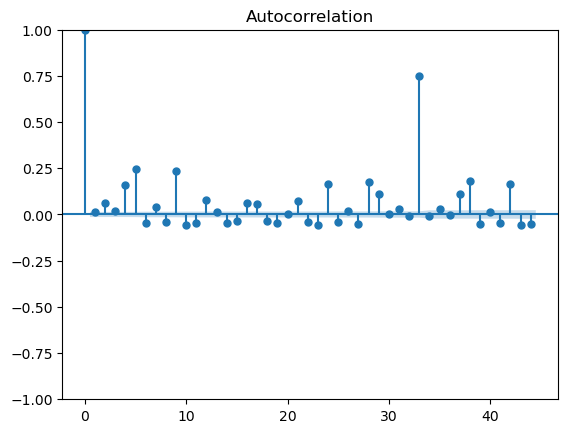

In [6]:
#Check Autocorrelation plot
plot_acf(df.sales)

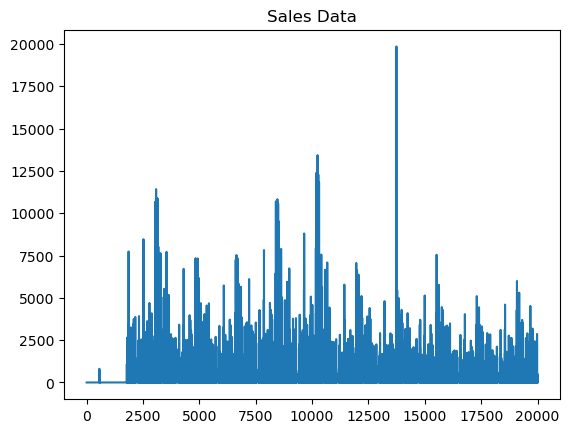

C:\Users\joona\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\joona\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                20000
Model:                 ARIMA(5, 2, 1)   Log Likelihood             -158716.744
Date:                Sun, 10 Dec 2023   AIC                         317447.488
Time:                        21:37:14   BIC                         317502.812
Sample:                             0   HQIC                        317465.589
                              - 20000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9306      0.006   -149.477      0.000      -0.943      -0.918
ar.L2         -0.7632      0.008    -95.751      0.000      -0.779      -0.748
ar.L3         -0.6455      0.010    -66.807      0.0

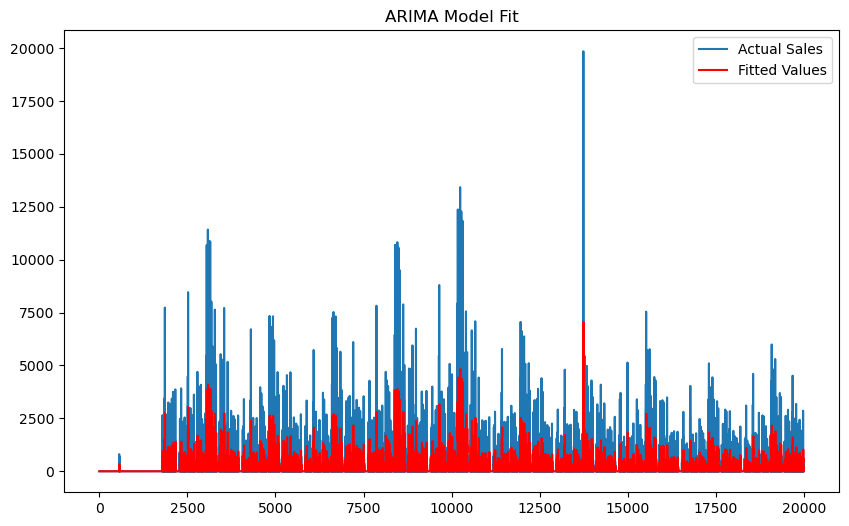

In [7]:
# Plot the time series data
df['sales'].plot(title='Sales Data')
plt.show()

# Define the ARIMA model
# You need to choose appropriate values for p, d, and q based on the ACF and PACF plots
p = 5  # Order of AR component
d = 2  # Order of differencing
q = 1  # Order of MA component
model = ARIMA(df['sales'], order=(p, d, q))

# Fit the model
results = model.fit()

# Display the model summary
print(results.summary())

# Plot the original time series and the fitted values
plt.figure(figsize=(10, 6))
plt.plot(df['sales'], label='Actual Sales')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()


20000
töötan0
töötan10
töötan20
töötan30
töötan40
töötan50
töötan60
töötan70
töötan80
töötan90
töötan100
töötan110
töötan120
töötan130
töötan140
töötan150
töötan160
töötan170
töötan180
töötan190
töötan200
töötan210
töötan220
töötan230
töötan240
töötan250
töötan260
töötan270
töötan280
töötan290
töötan300
töötan310
töötan320
töötan330
töötan340
töötan350
töötan360
töötan370
töötan380
töötan390
töötan400
töötan410
töötan420
töötan430
töötan440
töötan450
töötan460
töötan470
töötan480
töötan490
töötan500
töötan510
töötan520
töötan530
töötan540
töötan550
töötan560
töötan570
töötan580
töötan590
töötan600
töötan610
töötan620
töötan630
töötan640
töötan650
töötan660
töötan670
töötan680
töötan690
töötan700
töötan710
töötan720
töötan730
töötan740
töötan750
töötan760
töötan770
töötan780
töötan790
töötan800
töötan810
töötan820
töötan830
töötan840
töötan850
töötan860
töötan870
töötan880
töötan890
töötan900
töötan910
töötan920
töötan930
töötan940
töötan950
töötan960
töötan970
töötan980
töötan990
tööta

töötan7550
töötan7560
töötan7570
töötan7580
töötan7590
töötan7600
töötan7610
töötan7620
töötan7630
töötan7640
töötan7650
töötan7660
töötan7670
töötan7680
töötan7690
töötan7700
töötan7710
töötan7720
töötan7730
töötan7740
töötan7750
töötan7760
töötan7770
töötan7780
töötan7790
töötan7800
töötan7810
töötan7820
töötan7830
töötan7840
töötan7850
töötan7860
töötan7870
töötan7880
töötan7890
töötan7900
töötan7910
töötan7920
töötan7930
töötan7940
töötan7950
töötan7960
töötan7970
töötan7980
töötan7990
töötan8000
töötan8010
töötan8020
töötan8030
töötan8040
töötan8050
töötan8060
töötan8070
töötan8080
töötan8090
töötan8100
töötan8110
töötan8120
töötan8130
töötan8140
töötan8150
töötan8160
töötan8170
töötan8180
töötan8190
töötan8200
töötan8210
töötan8220
töötan8230
töötan8240
töötan8250
töötan8260
töötan8270
töötan8280
töötan8290
töötan8300
töötan8310
töötan8320
töötan8330
töötan8340
töötan8350
töötan8360
töötan8370
töötan8380
töötan8390
töötan8400
töötan8410
töötan8420
töötan8430
töötan8440
töötan8450

töötan14590
töötan14600
töötan14610
töötan14620
töötan14630
töötan14640
töötan14650
töötan14660
töötan14670
töötan14680
töötan14690
töötan14700
töötan14710
töötan14720
töötan14730
töötan14740
töötan14750
töötan14760
töötan14770
töötan14780
töötan14790
töötan14800
töötan14810
töötan14820
töötan14830
töötan14840
töötan14850
töötan14860
töötan14870
töötan14880
töötan14890
töötan14900
töötan14910
töötan14920
töötan14930
töötan14940
töötan14950
töötan14960
töötan14970
töötan14980
töötan14990
töötan15000
töötan15010
töötan15020
töötan15030
töötan15040
töötan15050
töötan15060
töötan15070
töötan15080
töötan15090
töötan15100
töötan15110
töötan15120
töötan15130
töötan15140
töötan15150
töötan15160
töötan15170
töötan15180
töötan15190
töötan15200
töötan15210
töötan15220
töötan15230
töötan15240
töötan15250
töötan15260
töötan15270
töötan15280
töötan15290
töötan15300
töötan15310
töötan15320
töötan15330
töötan15340
töötan15350
töötan15360
töötan15370
töötan15380
töötan15390
töötan15400
töötan15410
tööt

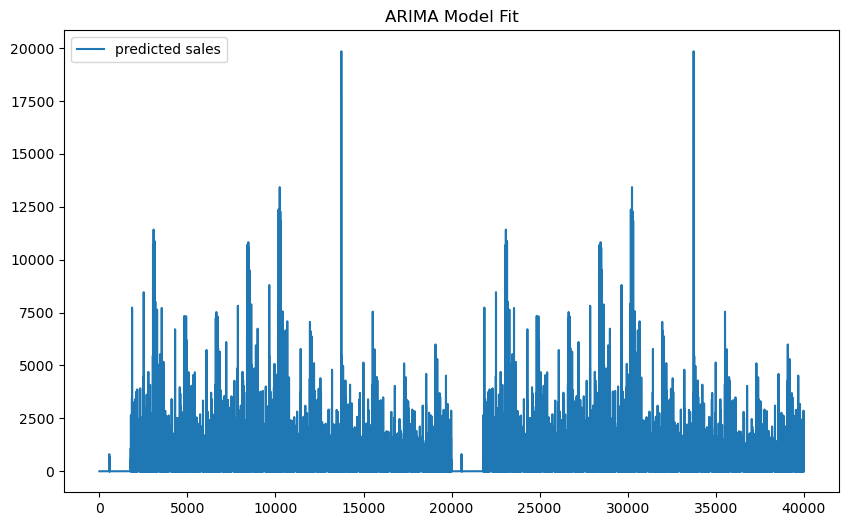

In [10]:
results.fittedvalues=results.fittedvalues*2.6
history = [x for x in df['sales']]
predictions=list()
print(len(df['sales']))
for t in range(len(df['sales'])):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = df['sales'][t]
    history.append(obs)
    if(t%10==0):
        print('töötan'+str(t))
plt.figure(figsize=(10, 6))
plt.plot(history, label='predicted sales')
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()

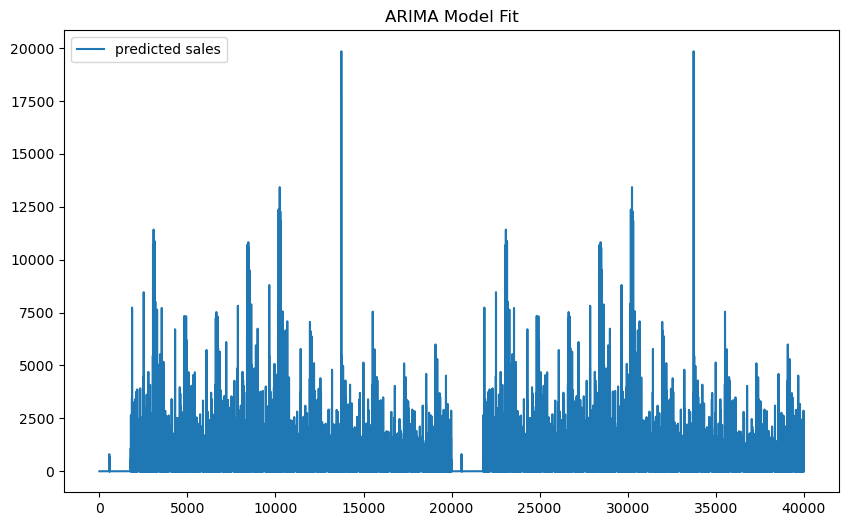

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(history, label='predicted sales')
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()

In [49]:
import math
file = open('ARIMApredictions.csv','w')
i=0
file.write("index,prediction,actual value,error")
averageerror=0
for elem in predictions:
    file.write(str(i)+","+str(elem)+','+str(df['sales'][i])+','+str(df['sales'][i]-elem)+'\n')
    averageerror+=(df['sales'][i]-elem)**2
    i+=1
file.close()
averageerror/=20000
averageerror=math.sqrt(averageerror)
print(averageerror)
    

677.1949251161146


In [32]:
print(df)

       store_nbr                      family   sales  onpromotion  dcoilwtico  \
0              1                  AUTOMOTIVE   0.000            0   93.140000   
1              1                   BABY CARE   0.000            0   93.140000   
2              1                      BEAUTY   0.000            0   93.140000   
3              1                   BEVERAGES   0.000            0   93.140000   
4              1                       BOOKS   0.000            0   93.140000   
...          ...                         ...     ...          ...         ...   
19995          2                     PRODUCE   0.000            0   67.692159   
19996          2  SCHOOL AND OFFICE SUPPLIES   0.000            0   67.692159   
19997          2                     SEAFOOD  25.204            0   67.692159   
19998         20                  AUTOMOTIVE   0.000            0   67.692159   
19999         20                   BABY CARE   0.000            0   67.692159   

        city      state  ty

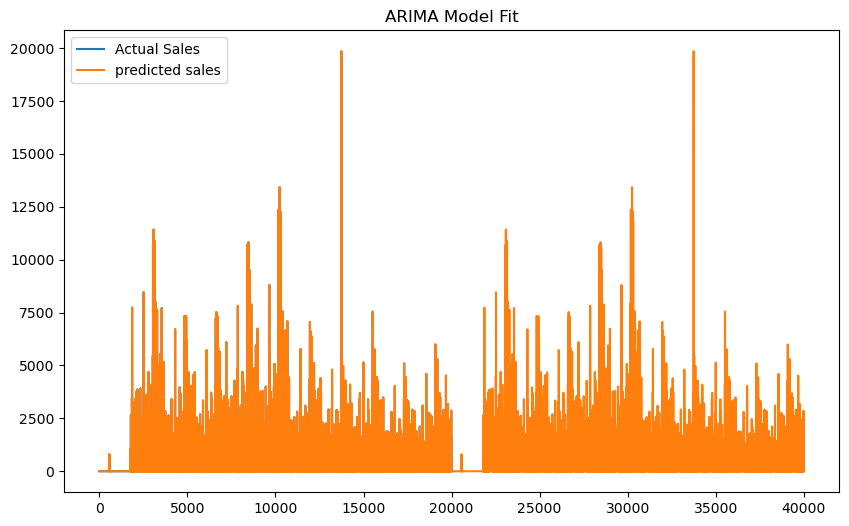

RMSE: 677.1949251161166
0.0
189.6007645363255
20000
<bound method Series.info of 0         0.000
1         0.000
2         0.000
3         0.000
4         0.000
          ...  
19995     0.000
19996     0.000
19997    25.204
19998     0.000
19999     0.000
Name: sales, Length: 20000, dtype: float64>


In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df['sales'], label='Actual Sales')
plt.plot(history, label='predicted sales')
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()
predictions2 = np.array(predictions)
obs2 = np.array(obs)
mse = np.mean((predictions2 - df['sales']) ** 2)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
print(obs2)
print(predictions2.mean())
print(len(predictions2))
print(df['sales'].info)

In [18]:
print(type(predictions[-1]))

<class 'numpy.float64'>


In [ ]:
# Plot the original time series and the fitted values
plt.figure(figsize=(10, 6))
plt.plot(df['sales'], label='Actual Sales')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()
print(df['sales'].describe())
print(results.predicted.describe())
print(results.fittedvalues)

In [ ]:
print(results.fittedvalues.sort_values(ascending=True))
print(df['sales'].sort_values(ascending=True))

In [ ]:

# Invert differencing to get predictions on the original scale
predictions_diff = pd.Series(results.fittedvalues, copy=True)
predictions_diff_cumsum = predictions_diff.cumsum()
predictions = pd.Series(df['sales'].iloc[0], index=df.index)
predictions = predictions.add(predictions_diff_cumsum, fill_value=0)

# Extract the actual values
actual_values = df['sales']

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, results.fittedvalues))
print(f'Root Mean Squared Error (RMSE): {rmse}')